## Importing required libraries

In [1]:
import numpy as np # Used for numerical operations, arrays, and mathematical computations.
import pandas as pd # Helps in data manipulation and analysis using DataFrames and Series.
import matplotlib.pyplot as plt # Used for creating static, animated, and interactive visualizations.
%matplotlib inline 
# Display matplotlib plots directly in Jupyter Notebook cells
import seaborn as sns # A visualization library built on top of Matplotlib, used for more attractive and informative statistical plots.
from sklearn import metrics # Import evaluation metrics for classification, regression, and clustering models
from sklearn.model_selection import train_test_split # Splits data into training and testing sets
from sklearn.preprocessing import OneHotEncoder  # Encodes categorical features as one-hot numeric arrays
from sklearn.compose import ColumnTransformer # Applies different preprocessing to specified columns
import warnings # Import the warnings module to control warning messages
warnings.filterwarnings('ignore') # Suppress all warning messages during code execution
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # Import specific metrics for evaluating classification model performance

## Loading data into dataframe


In [2]:
data = pd.read_csv("../data/phishing_site_urls.csv")

## Displaying top 5 Records

In [3]:
data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


## Displaying bottom 5 Records

In [4]:
data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


## nunique value in columns

In [5]:
data.nunique().T

URL      507195
Label         2
dtype: int64

## Rename labels for clarity


In [6]:
data["Label"] = data["Label"].apply(lambda x: "phishing" if x.lower() == "bad" else "legit")

## Check the distribution to confirm

In [7]:
print(data['Label'].value_counts())

#percentage
print("\nClass distribution (percent):")
print(data['Label'].value_counts(normalize=True) * 100)

Label
legit       392924
phishing    156422
Name: count, dtype: int64

Class distribution (percent):
Label
legit       71.525778
phishing    28.474222
Name: proportion, dtype: float64


## Shape of the data

In [8]:
data.shape

(549346, 2)

## column names in dataframe

In [9]:
data.columns

Index(['URL', 'Label'], dtype='object')

## Information of dataframe

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


## Description of dataset

In [11]:
data.describe().T

,count,unique,top,freq
URL,549346,507195,jhomitevd2abj3fk.tor2web.org/,52
Label,549346,2,legit,392924


## Checking Null values

In [12]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

## Handeling Duplicates

In [13]:
data.duplicated().sum()

42150

In [14]:
data=data.drop_duplicates()

In [15]:
data.duplicated().sum()

0

### Bar plot for Phishing vs Legit URL Count

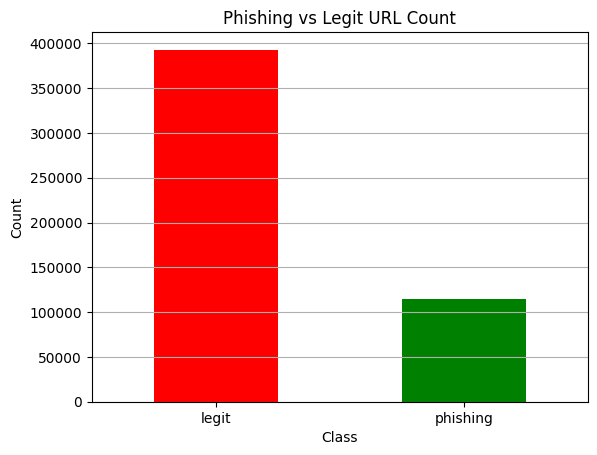

In [16]:
# Plot the distribution
data['Label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title("Phishing vs Legit URL Count")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Phishing Count in pie chart

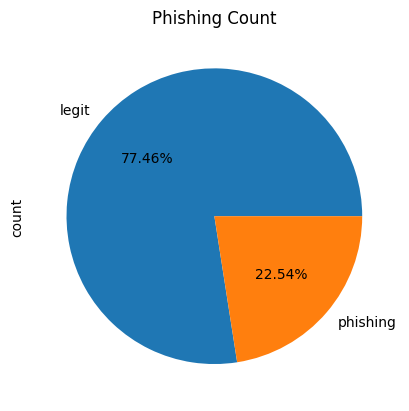

In [17]:
data['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## Split the data into 80% train and 20% test

In [18]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the train and test datasets
train_file_path = "../data/train.csv"
test_file_path = "../data/test.csv"

train_data.to_csv(train_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

train_file_path, test_file_path

('../data/train.csv', '../data/test.csv')